<a href="https://colab.research.google.com/github/CRISMARA-AI/Misophonia-Task/blob/main/Cristina_Mardones_ML_Assignment_23_10_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt #for unexpected output in exercise 2.1

**Exercise 1: Implement a function that computes the forward pass for the fixed weights `w` and bias `b` provided below:**

In [2]:
# Fix weight matrix for better comparison
w = np.arange(32*10).reshape(10, 32)
# Fix bias
b = np.arange(10)
print(f"fix weights: {w}")
print(f"fix bias: {b}")

fix weights: [[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
   50  51  52  53  54  55  56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
   82  83  84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
  114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
  146 147 148 149 150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
  178 179 180 181 182 183 184 185 186 187 188 189 190 191]
 [192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
  210 211 212 213 214 215 216 217 218 219 220 221 222 223]
 [224 225 226 227 228 229 230 231 232 233 234 235 236 23

**For comparison:**

In [3]:
def func_ex1(x):
    """
    This function performs the task of exercise 1
    You can use it to test whether 
    """
    # Creating a linear layer with pytorch
    linear = torch.nn.Linear(32, 10)
    # This is a bit ugly because a) you are not supposed to set the weights fixed from outside,
    # and b) because we convert numpy arrays to pytorch tensors with the correct dtype
    linear.bias = nn.Parameter(torch.tensor(b, dtype=torch.float))
    linear.weight = nn.Parameter(torch.tensor(w, dtype=torch.float))
    relu = torch.nn.ReLU()

    # Processing input
    x = x[np.newaxis] # Need to create dummy dimension for batch_size; alternative: reshape, or fancy indexing: x=x[None]
    x = torch.tensor(x, dtype=torch.float)
    z = linear(x)
    a = relu(z)
    return a

In [4]:
x = np.random.rand(32)

func_ex1(x)

tensor([[ 221.3307,  719.6135, 1217.8962, 1716.1791, 2214.4619, 2712.7446,
         3211.0276, 3709.3103, 4207.5933, 4705.8760]], grad_fn=<ReluBackward0>)

In [5]:
#Beginning of Answer for exercise 1.1
#defining x
def relu(x):
    return np.maximum(0.0, x)

In [6]:
#applying matrix multiplication and activation function
def ny_exl_funt(x_input, weight_matrix, bias_vector):
  #matrix multiplication between w and x with b added to it
  z = np.matmul(weight_matrix,x_input) + bias_vector
  #applying the activation function
  a = relu(z)
  return a


In [8]:
#comparing results succesfully
a = ny_exl_funt(x, w, b)
print(a)

[ 221.33065821  719.61346945 1217.89628068 1716.17909192 2214.46190316
 2712.74471439 3211.02752563 3709.31033686 4207.5931481  4705.87595934]


**Ex1.2: Combine the function of Ex. 1 multiple times with 3 fixed weight matrices of your choosing. Be careful to make sure that input and output dimensions match for all of them.**

In [9]:
#Answer: reshaping weights according to new values. After trying many values, >10<, I could not get better matches than 10 as a value
x = np.random.rand(32)

# 3 fixed weights: 
w1 = np.arange(10*32).reshape(10,32)
b1 = np.arange(10)
w2 = np.arange(10*10).reshape(10,10)
b2 = np.arange(10)
w3 = np.arange(10*10).reshape(10,10)
b3 = np.arange(10)

In [10]:
x1 = np.dot(w1, x) + b1
a1 = relu(x1)

x2 = np.dot(w2, a1) + b2
a2 = relu(x2)

x3 = np.dot(w3, a2) + b3
a3 = relu(x3)

a3

array([8.66135410e+07, 2.28306387e+08, 3.69999232e+08, 5.11692078e+08,
       6.53384923e+08, 7.95077769e+08, 9.36770614e+08, 1.07846346e+09,
       1.22015630e+09, 1.36184915e+09])

**Ex2.1: Implement a function that performs the convolutional layer forward pass for 1 fixed filter w and for the given input x. Use stride 1 and no padding.**

In [11]:
x = np.arange(20) # some input
w = np.array([1,0,1])

In [12]:
def calculation(slice_previous,w):
  value = np.dot(slice_previous,w)
  return value

In [13]:
z=[]
for i in range(len(x) - 2):
  slice_start = i
  slice_end = i + (len(w))
  slice = (slice_start,slice_end)

  slice_previous = x[slice_start:slice_end]
  num = calculation(slice_previous,w)
  z.append(num)

In [15]:
print(z)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]


In [16]:
#Unexpected Output, plotting the function:

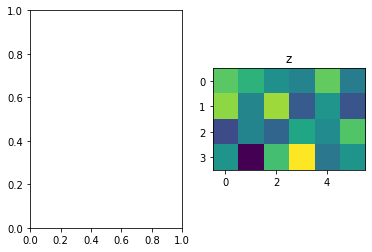

In [82]:
fig, axarr = plt.subplots(1,2)
axarr[1].set_title('z')
axarr[1].imshow(z[0,:,:,0])

**Ex2.2: Generalize the above function to handle multiple filters**

In [83]:
x = np.arange(20) # some input
w1 = np.array([1,0,1])
w2 = np.array([1,2,3])
w3 = np.array([5,6,7])

#Adding different weights
w4 = np.array([8,9,9])
w5 = np.array([1,1,1])

In [84]:
#defining function from stride 2
stride = 2

def convolution(x,z,w):
  z=[]
  for i in range(len(x) - (2*stride)):
    if i == 0: 
      slice_start = i  
    else: 
      slice_start = i + stride
    if i == 0: 
      slice_end = i  + (len(w))
    else: 
      slice_end = i + stride + (len(w))
    slice = (slice_start,slice_end)

    slice_previous = x[slice_start:slice_end]
    num = calculation(slice_previous,w)
    z.append(num)

  return z

In [86]:
convolution(x,z,w1)

[2, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36]

In [87]:
convolution(x,z,w2)

[8, 26, 32, 38, 44, 50, 56, 62, 68, 74, 80, 86, 92, 98, 104, 110]

In [88]:
convolution(x,z,w3)

[20, 74, 92, 110, 128, 146, 164, 182, 200, 218, 236, 254, 272, 290, 308, 326]

In [85]:
#Defining convolutions for new weights (w4, w5)

In [89]:
convolution(x,z,w4)

[27, 105, 131, 157, 183, 209, 235, 261, 287, 313, 339, 365, 391, 417, 443, 469]

In [90]:
convolution(x,z,w5)

[3, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54]

**Ex2.3: Generalize the above function to handle variable padding and stride. Test it for stride 2 and padding 2.**

In [91]:
x = np.arange(20) # some input
w1 = np.array([1,0,1])
w2 = np.array([1,2,3])
w3 = np.array([5,6,7])

In [92]:
# Setting up condition padding=2
x = np.pad(x, 2)

In [102]:
#repeating function from exercise 2.2, from stride 2
stride = 2

def convolution(x,z,w):
  z=[]
  for i in range(len(x) - (2*stride)):
    if i == 0: 
      slice_start = i  
    else: 
      slice_start = i + stride
    if i == 0: 
      slice_end = i  + (len(w))
    else: 
      slice_end = i + stride + (len(w))
    slice = (slice_start,slice_end)

    slice_previous = x[slice_start:slice_end]
    num = calculation(slice_previous,w)
    z.append(num)

  return z

In [114]:
#tests with w1, w2,w3

In [113]:
convolution(x,z,w1)

[0, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 18, 19]

In [117]:
convolution(x,z,w2) ##I do not know why it changed into vertical##

[0,
 14,
 20,
 26,
 32,
 38,
 44,
 50,
 56,
 62,
 68,
 74,
 80,
 86,
 92,
 98,
 104,
 110,
 56,
 19]

In [112]:
convolution(x,z,w3)

[0,
 38,
 56,
 74,
 92,
 110,
 128,
 146,
 164,
 182,
 200,
 218,
 236,
 254,
 272,
 290,
 308,
 326,
 204,
 95]